In [1]:
#Load the required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#Plot styling
import seaborn as sns; sns.set()  # for plot styling
%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
#Read the csv file
dataset=pd.read_csv('data.csv')
#Explore the dataset
dataset.head()#top 5 columns
len(dataset) # of rows
#descriptive statistics of the dataset
dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
INCOME,303.0,245.273927,48.499412,126.0,211.0,240.0,274.0,417.0
SPEND,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0


In [2]:
#dataset.describe().transpose()

/anaconda2/lib/python2.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,0,'Income / spend')

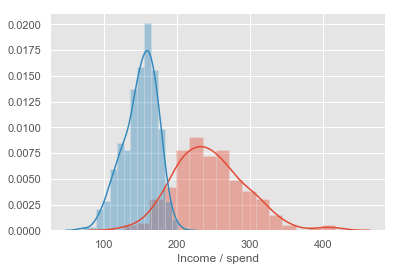

In [3]:
plot_income = sns.distplot(dataset["INCOME"])
plot_spend = sns.distplot(dataset["SPEND"])
plt.xlabel('Income / spend')

[(0, 420)]

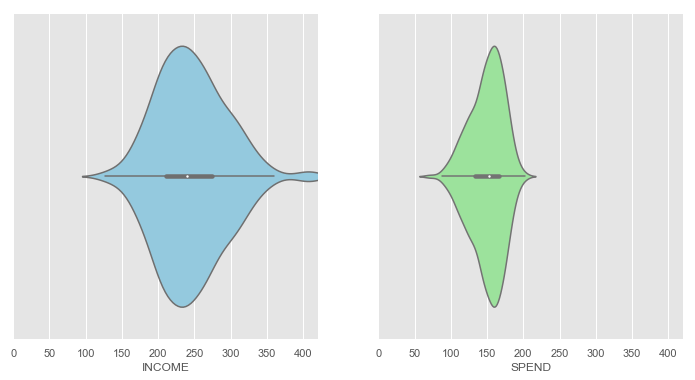

In [4]:
#Violin plot of Income and Spend
f, axes = plt.subplots(1,2, figsize=(12,6), sharex=True, sharey=True)
v1 = sns.violinplot(data=dataset, x='INCOME', color="skyblue",ax=axes[0])
v2 = sns.violinplot(data=dataset, x='SPEND',color="lightgreen", ax=axes[1])
v1.set(xlim=(0,420))

In [5]:
X = dataset.values

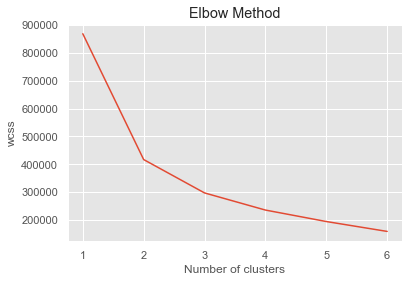

In [6]:
#Using the elbow method to find the optimum number of clusters
from sklearn.cluster import KMeans
wcss = []
for i in range(1,7):
    km=KMeans(n_clusters=i,init='k-means++', max_iter=3000, n_init=10, random_state=0)
    km.fit(X)
    wcss.append(km.inertia_)
plt.plot(range(1,7),wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('wcss')
plt.show()

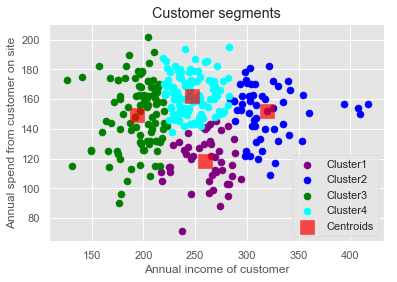

In [7]:
##Fitting kmeans to the dataset with k=4
km4=KMeans(n_clusters=4,init='k-means++', max_iter=900, n_init=10, random_state=0)
y_means = km4.fit_predict(X)
#Visualizing the clusters for k=4
plt.scatter(X[y_means==0,0],X[y_means==0,1],s=50, c='purple',label='Cluster1')
plt.scatter(X[y_means==1,0],X[y_means==1,1],s=50, c='blue',label='Cluster2')
plt.scatter(X[y_means==2,0],X[y_means==2,1],s=50, c='green',label='Cluster3')
plt.scatter(X[y_means==3,0],X[y_means==3,1],s=50, c='cyan',label='Cluster4')
plt.scatter(km4.cluster_centers_[:,0], km4.cluster_centers_[:,1],s=200,marker='s', c='red', alpha=0.7, label='Centroids')
plt.title('Customer segments')
plt.xlabel('Annual income of customer')
plt.ylabel('Annual spend from customer on site')
plt.legend()
plt.show()

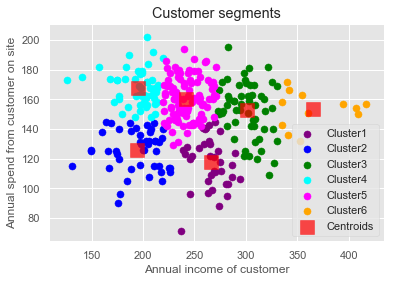

In [8]:
##Fitting kmeans to the dataset - k=6
km4=KMeans(n_clusters=6,init='k-means++', max_iter=300, n_init=10, random_state=0)
y_means = km4.fit_predict(X)
#Visualizing the clusters
plt.scatter(X[y_means==0,0],X[y_means==0,1],s=50, c='purple',label='Cluster1')
plt.scatter(X[y_means==1,0],X[y_means==1,1],s=50, c='blue',label='Cluster2')
plt.scatter(X[y_means==2,0],X[y_means==2,1],s=50, c='green',label='Cluster3')
plt.scatter(X[y_means==3,0],X[y_means==3,1],s=50, c='cyan',label='Cluster4')
plt.scatter(X[y_means==4,0],X[y_means==4,1],s=50, c='magenta',label='Cluster5')
plt.scatter(X[y_means==5,0],X[y_means==5,1],s=50, c='orange',label='Cluster6')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1],s=200,marker='s', c='red', alpha=0.7, label='Centroids')
plt.title('Customer segments')
plt.xlabel('Annual income of customer')
plt.ylabel('Annual spend from customer on site')
plt.legend()
plt.show()